## Agenda items EDA

In [136]:
import pandas as pd

# Load JSONL as DataFrame
agenda_flat = pd.read_json("../data/metadata/agendas.jsonl", lines=True)

# Display basic shape and sample
print(f"Total agenda items: {len(agenda_flat)}")
agenda_flat.sample(5)

Total agenda items: 24118


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc
23606,kent_cc_7530,Health Overview and Scrutiny Committee,1499990400000,7530,F103,Unlinked Document,,[https://democracy.kent.gov.uk/documents/s77634/Minutes 25052017 Health Overview and Scrutiny Committee.pdf],None,kent_cc_7530__F103,health-overview-and-scrutiny,0,1,unassigned,False,[kcc_cc_2017-07-14_a3dfde],1.0
23385,kent_cc_6349,Regulation Committee Appeal Panel (Transport),1458172800000,6349,53,Appeal 1 - 10am,Not upheld,[],Minutes:,kent_cc_6349__23385,regulation-appeal-panel-transport,2,0,appeal,False,None,NaN
16429,kent_cc_9262,Scrutiny Committee,1709078400000,9262,48,"Making a Difference Every Day, KCC’s Strategy for Adult Social Care 2022 to 2027 - update",Webcast for 48.,"[https://democracy.kent.gov.uk/documents/s123544/Making a Difference Every Day Our Strategy for Adult Social Care 2022 to 2027.pdf, https://democracy.kent.gov.uk/documents/s124592/MADE Update - Scrutiny Committee 28.02.24.pdf]",Additional documents:,kent_cc_9262__16429,scrutiny,3,2,discussion,True,"[kcc_cc_2024-02-28_704328, kcc_cc_2024-02-28_a8793e]",NaN
22753,kent_cc_6252,Children's Social Care and Health Cabinet Committee,1490227200000,6252,202,Apologies and Substitutes,"1.Apologies for absence had been received from Mr M J Vye. Mr D S\nDaley was present as a substitute for Mr Vye.2.The Chairman advised the committee that Mr Ireland and Mr Segurola\nwere attending interviews with visiting Ofsted inspectors and so\nwould be delayed in joining the meeting, and that the Cabinet\nMember, Mr Oakford, was serving on an interview panel and would\nattend only briefly to give a verbal update.",[],Minutes:,kent_cc_6252__22753,childrens-social-care-and-health-cabinet,72,0,apologies,False,None,NaN
3294,kent_cc_7866,Governance and Audit Committee,1556064000000,7866,27,Regional Growth Discovery Park Technology Investment Fund,Webcast for 27.,[https://democracy.kent.gov.uk/documents/s90001/Item 18 Regional Growth Discovery Park Technology Investment Fund 1.pdf],Additional documents:,kent_cc_7866__3294,governance-and-audit,3,1,discussion,True,[kcc_cc_2019-04-24_958143],NaN


In [137]:
# Count total items and embedding status by category
category_summary = agenda_flat.groupby("category").agg(
    total_items=("agenda_id", "count"),
    avg_word_count=("word_count", "mean"),
    with_pdfs=("pdf_count", lambda x: (x > 0).sum()),
    currently_embedded=("embed_status", "sum"),
).sort_values("total_items", ascending=False)

display(category_summary)

,total_items,avg_word_count,with_pdfs,currently_embedded
category,,,,
discussion,13646,119.250330,9986,13646
minutes,2067,20.803096,2021,0
appeal,2028,17.531065,2,1393
declarations,1467,13.897069,0,109
apologies,1208,14.517384,0,0
work_programme,866,21.211316,862,866
unassigned,614,0.000000,614,0
exempt_items,571,54.040280,4,0
election,391,21.971867,2,0


In [138]:
junk_patterns = ["webcast", "view the reasons why", "additional documents", "see minute", "1.", "2.", "3."]

def looks_like_junk(text):
    text = str(text).lower()
    return any(p in text for p in junk_patterns)

agenda_flat["junk_flag"] = agenda_flat["item_text"].apply(looks_like_junk)

# See how many "embedded=True" rows are junk
junk_check = agenda_flat[agenda_flat["embed_status"] & agenda_flat["junk_flag"]]
print(f"Potential junk chunks marked for embedding: {len(junk_check)}")

Potential junk chunks marked for embedding: 11608


<Figure size 1000x600 with 0 Axes>

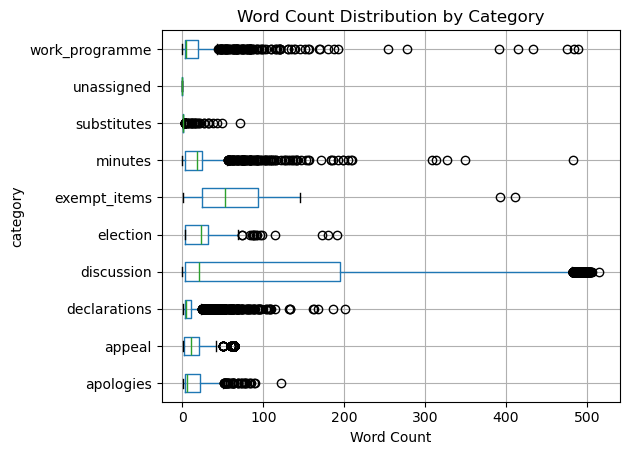

In [139]:
import matplotlib.pyplot as plt

top_categories = agenda_flat["category"].value_counts().head(10).index.tolist()

# Filter to top categories only
filtered = agenda_flat[agenda_flat["category"].isin(top_categories)]

plt.figure(figsize=(10, 6))
filtered.boxplot(column="word_count", by="category", vert=False)
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.suptitle("")
plt.tight_layout()
plt.show()

In [140]:
pd.set_option('display.max_colwidth', None)

In [141]:
# Sample borderline items by category
for cat in ["questions", "appeal", "appointments", "declarations"]:
    print(f"\n📂 Category: {cat}")
    display(agenda_flat[(agenda_flat["category"] == cat) & (agenda_flat["word_count"] < 50)].sample(3))


📂 Category: questions


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
1447,kent_cc_7595,Kent and Medway Police and Crime Panel,1506556800000,7595,245,Questions to the Commissioner,Webcast for 245.,[],Additional documents:,kent_cc_7595__1447,kent-and-medway-police-and-crime-panel,3,0,questions,False,None,NaN,True
8310,kent_cc_8457,County Council,1599696000000,8457,238,Questions,"In accordance with Procedure Rule 1.17(4), 8\nquestions were asked and replies given.A record of all questions put and answers given at the meeting are\navailableonlinewith the papers for this meeting.As\nIda Linfield was not present during this item a written answer to\nher question has been provided.",[https://democracy.kent.gov.uk/documents/s98828/CCQs and answers given at County Council 10 September 2020.pdf],Minutes:,kent_cc_8457__8310,county-council,48,1,questions,True,[kcc_cc_2020-09-10_472707],NaN,True
21493,kent_cc_6157,County Council,1463616000000,6157,7,Questions,Webcast for 7.,[https://democracy.kent.gov.uk/documents/s66331/questions 1-9_May 2016.pdf],Additional documents:,kent_cc_6157__21493,county-council,3,1,questions,True,[kcc_cc_2016-05-19_d71cb3],NaN,True



📂 Category: appeal


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
18049,kent_cc_9392,Regulation Committee Appeal Panel (Transport),1698105600000,9392,D2,Appeal 2 - Paper based,Restricted enclosure 6View the reasons why document D2/2 is restricted,[],Additional documents:,kent_cc_9392__18049,regulation-appeal-panel-transport,10,0,appeal,True,None,NaN,True
7,kent_cc_7380,Regulation Committee Appeal Panel (Transport),1469491200000,7380,72,Appeal 2 - 10.30,Restricted enclosure 8View the reasons why document 72./2 is restricted\nRestricted enclosure 9View the reasons why document 72./3 is restricted,[],Additional documents:,kent_cc_7380__0007,regulation-appeal-panel-transport,20,0,appeal,True,None,NaN,True
17757,kent_cc_9356,Regulation Committee Appeal Panel (Transport),1683763200000,9356,D1,Appeal 1 - Virtual,Restricted enclosure 4View the reasons why document D1/2 is restricted,[],Additional documents:,kent_cc_9356__17757,regulation-appeal-panel-transport,10,0,appeal,True,None,NaN,True



📂 Category: appointments


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
13263,kent_cc_9003,Kent and Medway Police and Crime Panel,1664236800000,9003,59,Decision OPCC.D.031.22 - Appointment of Temporary Chief Constable,RESOLVED that the decision be noted.,[https://democracy.kent.gov.uk/documents/s113840/Record of Decision.pdf],Minutes:,kent_cc_9003__13263,kent-and-medway-police-and-crime-panel,6,1,appointments,False,[kcc_cc_2022-09-27_2488ae],NaN,False
10858,kent_cc_8756,County Council,1646870400000,8756,63,Appointment of External Auditor,Webcast for 63.,[https://democracy.kent.gov.uk/documents/s109727/Report to County Council on appointment of external auditors.pdf],Additional documents:,kent_cc_8756__10858,county-council,3,1,appointments,False,[kcc_cc_2022-03-10_0be8af],NaN,True
10734,kent_cc_8746,Kent and Medway Joint Health and Wellbeing Board,1631750400000,8746,9,The Appointment of a representative to attend meetings of the Kent and Medway Primary Care Commissioning Group,Webcast for 9.,[https://democracy.kent.gov.uk/documents/s105343/Item 9 Appendix PCCC_terms_of_reference 003 003.pdf],Additional documents:,kent_cc_8746__10734,kent-and-medway-joint-health-and-wellbeing-board,3,1,appointments,False,[kcc_cc_2021-09-16_85b337],NaN,True



📂 Category: declarations


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
17948,kent_cc_9380,Cabinet,1692230400000,9380,2,Declarations of Interest,Webcast for 2.,[],Additional documents:,kent_cc_9380__17948,cabinet,3,0,declarations,False,None,NaN,True
10680,kent_cc_8742,Scrutiny Committee,1647993600000,8742,33,Declarations of Interests by Members in items on the Agenda for this Meeting,Webcast for 33.,[],Additional documents:,kent_cc_8742__10680,scrutiny,3,0,declarations,False,None,NaN,True
16118,kent_cc_9240,Governance and Audit Committee,1710806400000,9240,189,Declarations of Interest in items on the agenda for this meeting,Webcast for 189.,[],Additional documents:,kent_cc_9240__16118,governance-and-audit,3,0,declarations,False,None,NaN,True


In [142]:
junk_patterns = ["webcast", "view the reasons why", "additional documents", "see minute", "1.", "2.", "3."]

def looks_like_junk(text):
    text = str(text).lower()
    return any(p in text for p in junk_patterns)

agenda_flat["junk_flag"] = agenda_flat["item_text"].apply(looks_like_junk)

In [143]:
def assign_embed_status(row):
    category = row["category"]
    wc = row["word_count"]
    text = str(row["item_text"]).lower()
    has_pdf = isinstance(row.get("pdf_urls"), list) and len(row["pdf_urls"]) > 0
    is_junk = row.get("junk_flag", False)

    if is_junk:
        return False

    if category == "discussion":
        return wc > 10

    if category == "work_programme":
        return wc > 10

    if category == "questions":
        return wc > 30 or has_pdf

    if category == "appeal":
        return wc > 10 or "restricted" in text

    if category == "appointments":
        return wc > 20

    if category == "declarations":
        return wc > 50

    return False

agenda_flat["embed_status"] = agenda_flat.apply(assign_embed_status, axis=1)

In [144]:
category_stats = agenda_flat.groupby("category").agg(
    total_items=("agenda_id", "count"),
    embedded_items=("embed_status", "sum"),
    avg_word_count=("word_count", "mean"),
    junk_count=("junk_flag", "sum")
)

category_stats["embed_ratio"] = category_stats["embedded_items"] / category_stats["total_items"]
category_stats = category_stats.sort_values("total_items", ascending=False)

display(category_stats)

,total_items,embedded_items,avg_word_count,junk_count,embed_ratio
category,,,,,
discussion,13646,2713,119.250330,9538,0.198813
minutes,2067,0,20.803096,962,0.000000
appeal,2028,4,17.531065,1394,0.001972
declarations,1467,77,13.897069,715,0.052488
apologies,1208,0,14.517384,579,0.000000
work_programme,866,141,21.211316,531,0.162818
unassigned,614,0,0.000000,0,0.000000
exempt_items,571,0,54.040280,270,0.000000
election,391,0,21.971867,251,0.000000


In [145]:
for cat in ["questions", "appeal", "appointments", "declarations"]:
    print(f"\n📂 Category: {cat}")
    sample = agenda_flat[
        (agenda_flat["category"] == cat) &
        (agenda_flat["word_count"] < 40) &
        (~agenda_flat["junk_flag"])
    ].sample(3)
    display(sample)


📂 Category: questions


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
8340,kent_cc_8459,County Council,1607558400000,8459,262,Questions,"Inaccordance with Sections 14.15 to 14.22 of the\nCouncil’s constitution, 13 questions were asked, and replies\ngiven. A record of all questions put and answers given at the\nmeeting is availableonlinewith the papers for this\nmeeting.",[https://democracy.kent.gov.uk/documents/s100989/Item 5 - CCQs and Answers - 10.12.20.pdf],Minutes:,kent_cc_8459__8340,county-council,36,1,questions,True,[kcc_cc_2020-12-10_172a17],NaN,False
19335,kent_cc_9527,County Council,1747872000000,9527,10,County Council Questions,County Council Questions,[],None,kent_cc_9527__19335,county-council,3,0,questions,False,None,NaN,False
10796,kent_cc_8752,County Council,1635984000000,8752,31,Questions,"Inaccordance with Sections 14.15 to 14.22 of the\nConstitution, 11 questions were asked and replies given. A record\nof all questions put and answers given at the meeting is\navailableonlinewith the papers for this\nmeeting.",[https://democracy.kent.gov.uk/documents/s107064/CCQs with answers - 4 November 2021.pdf],Minutes:,kent_cc_8752__10796,county-council,35,1,questions,True,[kcc_cc_2021-11-04_b4de39],NaN,False



📂 Category: appeal


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
23389,kent_cc_6349,Regulation Committee Appeal Panel (Transport),1458172800000,6349,56,Appeal 4 - 11.30,Appeal withdrawn new evidence came to light\nand allocated transport,[],Minutes:,kent_cc_6349__23389,regulation-appeal-panel-transport,10,0,appeal,False,None,NaN,False
2566,kent_cc_7754,Regulation Committee Appeal Panel (Transport),1501200000000,7754,130,Appeal 5 - 12.00,UPHELD,[],Minutes:,kent_cc_7754__2566,regulation-appeal-panel-transport,1,0,appeal,False,None,NaN,False
23251,kent_cc_6313,Regulation Committee Appeal Panel (Transport),1452816000000,6313,35,Appeal 6- 13.30,Upheld,[],Minutes:,kent_cc_6313__23251,regulation-appeal-panel-transport,1,0,appeal,False,None,NaN,False



📂 Category: appointments


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
8379,kent_cc_8463,County Council,1622073600000,8463,9,Appointment of Leader of the Opposition,Mr Hook moved and Mrs Wood\nseconded that Dr L Sullivan be appointed Leader of the\nOpposition.Carried without a formalvote,[],Minutes:,kent_cc_8463__8379,county-council,20,0,appointments,False,None,NaN,False
19334,kent_cc_9527,County Council,1747872000000,9527,9,Appointment of the Leader of the Opposition,Appointment of the Leader of the Opposition,[],None,kent_cc_9527__19334,county-council,7,0,appointments,False,None,NaN,False
13263,kent_cc_9003,Kent and Medway Police and Crime Panel,1664236800000,9003,59,Decision OPCC.D.031.22 - Appointment of Temporary Chief Constable,RESOLVED that the decision be noted.,[https://democracy.kent.gov.uk/documents/s113840/Record of Decision.pdf],Minutes:,kent_cc_9003__13263,kent-and-medway-police-and-crime-panel,6,1,appointments,False,[kcc_cc_2022-09-27_2488ae],NaN,False



📂 Category: declarations


,meeting_id,committee_name,meeting_date,web_meeting_code,item_number,item_title,item_text,pdf_urls,sub_item_content,agenda_id,committee_id,word_count,pdf_count,category,embed_status,doc_ids,missing_doc,junk_flag
20254,kent_cc_9645,Governance and Audit Committee,1742428800000,9645,290,Declarations of Interest in items on the agenda for this meeting,There were no declarations of interest.,[],Minutes:,kent_cc_9645__20254,governance-and-audit,6,0,declarations,False,None,NaN,False
10223,kent_cc_8690,Cabinet,1606694400000,8690,184,Declaration of Interests by Member in Items on the Agenda for this meeting,There were no declarations of interest.,[],Minutes:,kent_cc_8690__10223,cabinet,6,0,declarations,False,None,NaN,False
10653,kent_cc_8737,Scrutiny Committee,1625616000000,8737,6,Declarations of Interests by Members in items on the Agenda for this Meeting,No declarations were\nmade.,[],Minutes:,kent_cc_8737__10653,scrutiny,4,0,declarations,False,None,NaN,False


In [146]:
def looks_like_junk(row):
    text = str(row["item_text"]).lower()
    wc = row["word_count"]
    category = row["category"]

    junk_patterns = ["webcast", "view the reasons why", "additional documents", "see minute"]
    if any(p in text for p in junk_patterns):
        return True

    if category == "appeal":
        return True  # All redacted

    # Hard universal cutoff
    if wc < 20:
        return True

    name_triggers = ["mr ", "ms ", "mrs ", "dr ", "miss "]

    # DECLARATIONS: keep short items only if someone is named
    if category == "declarations":
        if wc < 30 and not any(p in text for p in name_triggers):
            return True

    # QUESTIONS: same logic
    if category == "questions":
        if wc < 30 and not any(p in text for p in name_triggers):
            return True

    return False

In [147]:
agenda_flat["junk_flag"] = agenda_flat.apply(looks_like_junk, axis=1)

In [148]:
# Sample 10 random junk items for review
junk_sample = agenda_flat[agenda_flat["junk_flag"]].sample(10)

# Show relevant columns for inspection
cols = ["category", "word_count", "item_title", "item_text", "pdf_urls", "embed_status"]
display(junk_sample[cols])

,category,word_count,item_title,item_text,pdf_urls,embed_status
4286,discussion,3,19/00014 - Proposed Revision of Rates Payable and Charges Levied for Children's Services in 2019-20,Webcast for 85.,"[https://democracy.kent.gov.uk/documents/s89752/Item 10 - PROD Rates and Charges.pdf, https://democracy.kent.gov.uk/documents/s89720/Item 10 - Appendix 1.pdf]",False
21533,discussion,3,Chairman's Announcements,Webcast for 27.,[],False
20107,discussion,9,B OTHER ITEMS WHICH THE CHAIRMAN DECIDES ARE URGENT,B OTHER ITEMS WHICH THE CHAIRMAN DECIDES ARE URGENT,[],False
17063,discussion,3,Verbal Update by Cabinet Members,Webcast for 4.,[],False
15143,declarations,3,Declarations of Interest,Webcast for 1.,[],False
6118,discussion,0,Superannuation Fund Report & Accounts and External Audit,,"[https://democracy.kent.gov.uk/documents/s91957/Item 10 - Appendix 1 - Fund Report and Accounts - 2018-19.pdf, https://democracy.kent.gov.uk/documents/s91962/Item - 10 Appendix 2 - External Auditors Audit Findings report.pdf, https://democracy.kent.gov.uk/documents/s91960/Item 10 - Appendix 3 - Investment Strategy Statement 2019.pdf, https://democracy.kent.gov.uk/documents/s91958/Item 10 - Appendix 4 - Governance Compliance Statement 2019.pdf]",False
23740,unassigned,0,Unlinked Document,,[https://democracy.kent.gov.uk/documents/s85424/Trust Report.pdf],False
9870,discussion,0,Planning Applications Committee Virtual Meetings Protocol,,[https://democracy.kent.gov.uk/documents/s96846/Item A3 Appendix PAC Protocol.pdf],False
3569,next_meeting,17,Date of Next Meeting,It was noted that the next meeting of the\nCommittee would be held on 13 November 2018.,[],False
20298,discussion,9,B OTHER ITEMS WHICH THE CHAIRMAN DECIDES ARE URGENT,B OTHER ITEMS WHICH THE CHAIRMAN DECIDES ARE URGENT,[],False


In [156]:
# Sample 10 non-junk items under 50 words
non_junk_sample = agenda_flat[
    (~agenda_flat["junk_flag"]) & 
    (agenda_flat["word_count"] < 30)
].sample(10, random_state=42)

# Display relevant fields for inspection
cols = ["category", "word_count", "item_title", "item_text", "pdf_urls", "embed_status"]
display(non_junk_sample[cols])

,category,word_count,item_title,item_text,pdf_urls,embed_status
12727,discussion,25,External Audit Progress Report and Sector Update,(1)Mr Paul Dossett from Grant Thornton UK LLP introduced the report on\ncurrent progress on external audit work.(2)RESOLVED that the report be noted for\nassurance.,[https://democracy.kent.gov.uk/documents/s112945/Kent County Council Governance and Audit Committee Progress report - July 2022.pdf],True
14552,discussion,20,Membership,It was\nnoted thatMr N Baker and Mr H\nRayner had joined the committee to fill the two Conservative\nvacancies.,[],True
5600,minutes,23,Minutes of the meeting on 11 November 2019,RESOLVED that the Minutes of the meeting held\non 11 November 2019 are correctly recorded and that they be signed\nby the Chairman.,[https://democracy.kent.gov.uk/documents/s95901/Minutes 11112019 Kent Flood Risk Management Committee.pdf],False
3166,minutes,23,Minutes of the meeting on 5 March 2018,RESOLVED that the Minutes of the meeting held\non 5 March 2018 are correctly recorded and that they be signed by\nthe Chairman.,[https://democracy.kent.gov.uk/documents/s85295/Minutes 05032018 Kent Flood Risk Management Committee.pdf],False
3298,minutes,23,Minutes - 16 May 2018,RESOLVED that the Minutes of the meeting held\non 16 May 2018 are correctly recorded and that they be signed by\nthe Chairman.,[https://democracy.kent.gov.uk/documents/s84719/Minutes 16052018 Planning Applications Committee.pdf],False
12277,discussion,25,KCC Insurance Overview,(1)The\nInsurance Managerprovided a summary of insurance\nactivity for the 2020/21 financial year and other points of\ninterest.(2)RESOLVED that the report\nbe noted for assurance.,[https://democracy.kent.gov.uk/documents/s105806/Item 11 KCC Insurance Overview.pdf],True
8378,election,29,Election of Leader,Mr Oakford proposed and Mrs Cole seconded that\nMr R Gough be elected Leader of the Council until the annual\nmeeting of the council in 2025.Carried without a formalvote,[],False
1290,next_meeting,27,Date of next meeting,It was noted that the next meeting of the\nCommittee would be held onFriday 9 February 2018and that the venue for this meeting may be Oakwood House.,[],False
15971,minutes,24,"Minutes of the Commissioner's Governance Board meetings held on 13 September 2023, 29 November 2023 and 28 February 2024","RESOLVED: that the\nminutes of the Performance and Delivery Board meetings held on 13\nSeptember 2023, 29 November 2023 and 28 February 2024be\nnoted.","[https://democracy.kent.gov.uk/documents/s125977/29 November 2023 PD Board Meeting Notes.pdf, https://democracy.kent.gov.uk/documents/s125978/28 February 2024 PD Board Meeting Notes.pdf, https://democracy.kent.gov.uk/documents/s125976/13 September 2023 PD Board Meeting Notes.pdf]",False
1032,minutes,24,Minutes of the meeting held on 15 September 2017,Resolved that the minutes\nof the meeting held on the 15 September 2017 are correctly recorded\nand that they be signed by the Chairman.,[https://democracy.kent.gov.uk/documents/s81367/Irem 4Minutes.pdf],False


In [157]:
category_stats = agenda_flat.groupby("category").agg(
    total_items=("agenda_id", "count"),
    embedded_items=("embed_status", "sum"),
    avg_word_count=("word_count", "mean"),
    junk_count=("junk_flag", "sum")
)

category_stats["embed_ratio"] = category_stats["embedded_items"] / category_stats["total_items"]
category_stats = category_stats.sort_values("total_items", ascending=False)

display(category_stats)

,total_items,embedded_items,avg_word_count,junk_count,embed_ratio
category,,,,,
discussion,13646,2713,119.250330,6899,0.198813
minutes,2067,0,20.803096,1071,0.000000
appeal,2028,4,17.531065,2028,0.001972
declarations,1467,77,13.897069,1168,0.052488
apologies,1208,0,14.517384,851,0.000000
work_programme,866,141,21.211316,657,0.162818
unassigned,614,0,0.000000,614,0.000000
exempt_items,571,0,54.040280,133,0.000000
election,391,0,21.971867,188,0.000000


### ✅ Agenda Embedding EDA – Final Filtering Rules and Justification

Following a detailed review of 23,500+ agenda items, we implemented a robust junk filtering and embedding selection strategy to ensure only semantically meaningful content is included in the FAISS index.

#### 🔍 Summary of Findings
- Many agenda categories contain a large volume of procedural, redacted, or placeholder items ("Webcast for X", "UPHELD", etc.).
- Categories like `appeal`, `questions`, `declarations`, and `appointments` contain valuable information but also lots of noise.
- Word count alone is not sufficient — short but meaningful items exist, especially if they reference specific individuals.

#### 🧠 Final Junk Filter Logic
1. **Universal junk patterns:** exclude any item text containing:
   - `"webcast"`, `"view the reasons why"`, `"additional documents"`, `"see minute"`

2. **Category-based exclusions:**
   - `appeal`: always excluded due to GDPR redaction
   - `questions`: excluded unless >30 words or includes a personal name
   - `declarations`: excluded unless >30 words or includes a personal name

3. **Named-person exception:** 
   - If the text contains `"Mr"`, `"Ms"`, `"Mrs"`, `"Miss"`, or `"Dr"`, we allow embedding even under 30-word cutoff

4. **Universal hard cutoff:**
   - Any item with `word_count < 20` is treated as junk unless explicitly rescued by category logic

#### 📌 Results
- Over 9,500 junk entries removed from the `discussion` category alone
- False negatives identified and rescued in `declarations` and `questions` by checking for named individuals
- Embedded items now represent high-value, information-rich agenda points

This filter logic is now used to populate `agenda_manifest.jsonl`, which controls chunking and embedding for the agenda search pipeline.